<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/TRADE_PROBABILITIES_BASE_FILE_2%25RISK_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import random
import matplotlib.pyplot as plt

BASE_CAPITAL = 25000
RISK_PERCENTAGE_TRADE = 0.02  # 2% of cumulative capital per trade
LOT_SIZE = 15  # 15 units per trade
RISK_POINTS = 20  # Points risked per trade
LOSS_PER_LOT = LOT_SIZE * RISK_POINTS  # Loss per lot = 15 * 20 = 300
REWARD_PER_LOT = LOT_SIZE * 2.5 * RISK_POINTS  # Reward = 15 * 50 = 750
REWARD_POINTS = 2.5*RISK_POINTS
TARGET_PCT = 40
STOPLOSS_PCT = 60

# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

# **ENTRY PRICE**

In [50]:


# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Generate 1000 columns with random numbers between 100 and 500
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [random.randint(300, 450) for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('trade_entry.csv', index=False)

# Print confirmation message
print("CSV file 'trade_entry.csv' has been created.")

CSV file 'trade_entry.csv' has been created.


In [51]:
pd.read_csv('trade_entry.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,447,347,355,365,419,332,345,419,390,...,328,435,320,374,307,414,320,407,427,308
1,TRADE 0002,429,403,403,358,366,383,433,314,328,...,423,342,319,373,420,308,312,377,319,350
2,TRADE 0003,407,444,359,339,364,332,395,394,365,...,394,430,343,374,389,335,338,330,341,373
3,TRADE 0004,318,450,391,379,323,440,334,399,391,...,389,337,376,322,397,447,414,425,319,398
4,TRADE 0005,443,442,335,301,350,415,335,375,411,...,364,318,383,363,369,405,440,311,435,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,388,368,344,345,381,390,421,399,331,...,431,340,419,432,424,300,333,399,321,345
996,TRADE 0997,423,409,305,310,383,361,389,408,401,...,449,318,343,420,415,332,440,443,307,415
997,TRADE 0998,303,303,327,367,378,366,428,359,390,...,441,392,362,341,434,447,410,442,304,398
998,TRADE 0999,366,415,447,315,314,329,416,318,415,...,404,315,374,352,434,395,353,314,316,383


# **RANDOM TARGET AND STOPLOSS**

**40 % TARGET 60 % STOPLOSS**

**RISK:REWARD 1:2.5**

In [52]:

# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Function to randomly assign "TARGET" (40%) or "STOPLOSS" (60%)
def assign_target_or_stoploss():
    return random.choices(["TARGET", "STOPLOSS"], weights=[TARGET_PCT, STOPLOSS_PCT], k=1)[0]

# Generate 1000 columns with "TARGET" or "STOPLOSS"
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [assign_target_or_stoploss() for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('target_stoploss.csv', index=False)

# Print confirmation message
print("CSV file 'target_stoploss' has been created.")


CSV file 'target_stoploss' has been created.


In [53]:
pd.read_csv('target_stoploss.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,...,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
1,TRADE 0002,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,TARGET
2,TRADE 0003,TARGET,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,...,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
3,TRADE 0004,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,...,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,TARGET,TARGET,STOPLOSS,TARGET
4,TRADE 0005,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,...,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS
996,TRADE 0997,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,...,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,TARGET,TARGET
997,TRADE 0998,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS
998,TRADE 0999,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET


In [54]:
# Load the CSV file
df_t = pd.read_csv('target_stoploss.csv')

# Exclude the "TRADE NO" column from the calculations (if it exists)
if "TRADE NO" in df_t.columns:
    df_t_excluded = df_t.drop(columns=["TRADE NO"])
else:
    df_t_excluded = df_t

# 1. Calculate the max value of count "TARGET" and its column name
max_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmax()  # Column with max "TARGET"
max_target_value = (df_t_excluded[max_target_column] == "TARGET").sum()  # Max count of "TARGET"
max_target_percentage = (max_target_value / len(df_t)) * 100  # Percentage of max "TARGET"
print(f"Max Count of 'TARGET': {max_target_percentage:.1f}% in Column: {max_target_column}")

# 2. Calculate the min value of count "TARGET" and its column name
min_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmin()  # Column with min "TARGET"
min_target_value = (df_t_excluded[min_target_column] == "TARGET").sum()  # Min count of "TARGET"
min_target_percentage = (min_target_value / len(df_t)) * 100  # Percentage of min "TARGET"
print(f"Min Count of 'TARGET': {min_target_percentage:.1f}% in Column: {min_target_column}")

# 3. Calculate the average value of count "TARGET" from all columns
target_counts = df_t_excluded.apply(lambda col: (col == "TARGET").sum())  # Count "TARGET" in each column
average_target_value = target_counts.mean()  # Average count of "TARGET"
average_target_percentage = (average_target_value / len(df_t)) * 100  # Percentage of average "TARGET"
print(f"Average Count of 'TARGET': {average_target_percentage:.2f}%")


Max Count of 'TARGET': 45.7% in Column: COLUMN_782
Min Count of 'TARGET': 34.6% in Column: COLUMN_916
Average Count of 'TARGET': 40.00%


In [55]:
column_name = 'COLUMN_199' # select column_name from COLUMN_1 to COLUMN_1000 COLUMN_888_CUM_PNL
# Count the frequency of "TARGET" and "STOPLOSS" in COLUMN_1
frequency = df_t[column_name].value_counts()/10

# Print the results
print(frequency)

COLUMN_199
STOPLOSS    59.0
TARGET      41.0
Name: count, dtype: float64


# **PnL**

In [56]:
# Load the two CSV files
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create an empty dictionary to hold the PnL data
pnl_data = {
    "TRADE NO": entry_df["TRADE NO"]  # Retain the "TRADE NO" column
}

# Iterate over each column (excluding "TRADE NO") to apply the PnL logic
for column in entry_df.columns[1:]:
    # Calculate PnL values for the column
    pnl_values = target_stoploss_df[column].apply(lambda x: (REWARD_POINTS if x == "TARGET" else -RISK_POINTS) * LOT_SIZE)

    # Create a Series with the base capital and concatenate it with PnL values
    base_series = pd.Series([BASE_CAPITAL])
    cumulative_pnl = pd.concat([base_series, pnl_values], ignore_index=True).cumsum()

    # Store the cumulative PnL in the dictionary (excluding the initial capital row)
    pnl_data[column] = cumulative_pnl.iloc[1:].values

# Create a DataFrame from the PnL data
pnl_df = pd.DataFrame(pnl_data)

# Save the modified PnL DataFrame to a new CSV file
pnl_df.to_csv('trade_pnl.csv', index=False)

# Print confirmation message
print("CSV file 'trade_pnl.csv' has been created with cumulative PnL and base capital added.")

CSV file 'trade_pnl.csv' has been created with cumulative PnL and base capital added.


In [57]:
pd.read_csv('trade_pnl.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,25750.0,25750.0,24700.0,25750.0,24700.0,24700.0,25750.0,24700.0,25750.0,...,25750.0,24700.0,25750.0,24700.0,24700.0,25750.0,25750.0,24700.0,24700.0,24700.0
1,TRADE 0002,26500.0,26500.0,25450.0,26500.0,24400.0,24400.0,26500.0,24400.0,25450.0,...,25450.0,24400.0,25450.0,24400.0,24400.0,26500.0,26500.0,25450.0,24400.0,25450.0
2,TRADE 0003,27250.0,27250.0,25150.0,27250.0,25150.0,24100.0,27250.0,24100.0,26200.0,...,26200.0,24100.0,25150.0,25150.0,24100.0,27250.0,27250.0,25150.0,24100.0,25150.0
3,TRADE 0004,26950.0,26950.0,24850.0,26950.0,24850.0,24850.0,26950.0,24850.0,25900.0,...,26950.0,23800.0,25900.0,25900.0,24850.0,28000.0,28000.0,25900.0,23800.0,25900.0
4,TRADE 0005,26650.0,26650.0,25600.0,26650.0,25600.0,24550.0,26650.0,24550.0,25600.0,...,26650.0,23500.0,25600.0,25600.0,24550.0,28750.0,28750.0,25600.0,24550.0,25600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,152500.0,169300.0,132550.0,140950.0,159850.0,135700.0,152500.0,163000.0,160900.0,...,150400.0,135700.0,131500.0,145150.0,118900.0,132550.0,145150.0,128350.0,151450.0,133600.0
996,TRADE 0997,152200.0,169000.0,132250.0,141700.0,160600.0,136450.0,152200.0,162700.0,161650.0,...,150100.0,135400.0,131200.0,145900.0,119650.0,133300.0,145900.0,128050.0,152200.0,134350.0
997,TRADE 0998,152950.0,168700.0,131950.0,142450.0,160300.0,136150.0,151900.0,162400.0,162400.0,...,149800.0,136150.0,130900.0,146650.0,119350.0,133000.0,145600.0,128800.0,152950.0,134050.0
998,TRADE 0999,153700.0,169450.0,131650.0,143200.0,160000.0,135850.0,151600.0,163150.0,163150.0,...,149500.0,135850.0,130600.0,146350.0,119050.0,133750.0,146350.0,128500.0,152650.0,134800.0


In [58]:
import pandas as pd

# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl.csv')

# Get the last row as a DataFrame
last_row_df = df_no_charges.iloc[[-1]]

# Filter only numeric values from the last row
numeric_values = last_row_df.select_dtypes(include=['number'])

# Find the max and min values along with their corresponding column names
max_value = numeric_values.max(axis=1).values[0]  # Max value
max_column = numeric_values.idxmax(axis=1).values[0]  # Column name of max value

min_value = numeric_values.min(axis=1).values[0]  # Min value
min_column = numeric_values.idxmin(axis=1).values[0]  # Column name of min value


# Output the results
print(f"Max Capital: {max_value} in Column: {max_column}")
Max_Capital_growth_pct = (max_value * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_value} in Column: {min_column}")
Min_Capital_growth_pct = (min_value * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max Capital: 204850.0 in Column: COLUMN_782
Max Capital growth with 1 lot: 819.40 %
Min Capital: 88300.0 in Column: COLUMN_916
Min Capital growth with 1 lot: 353.20 %


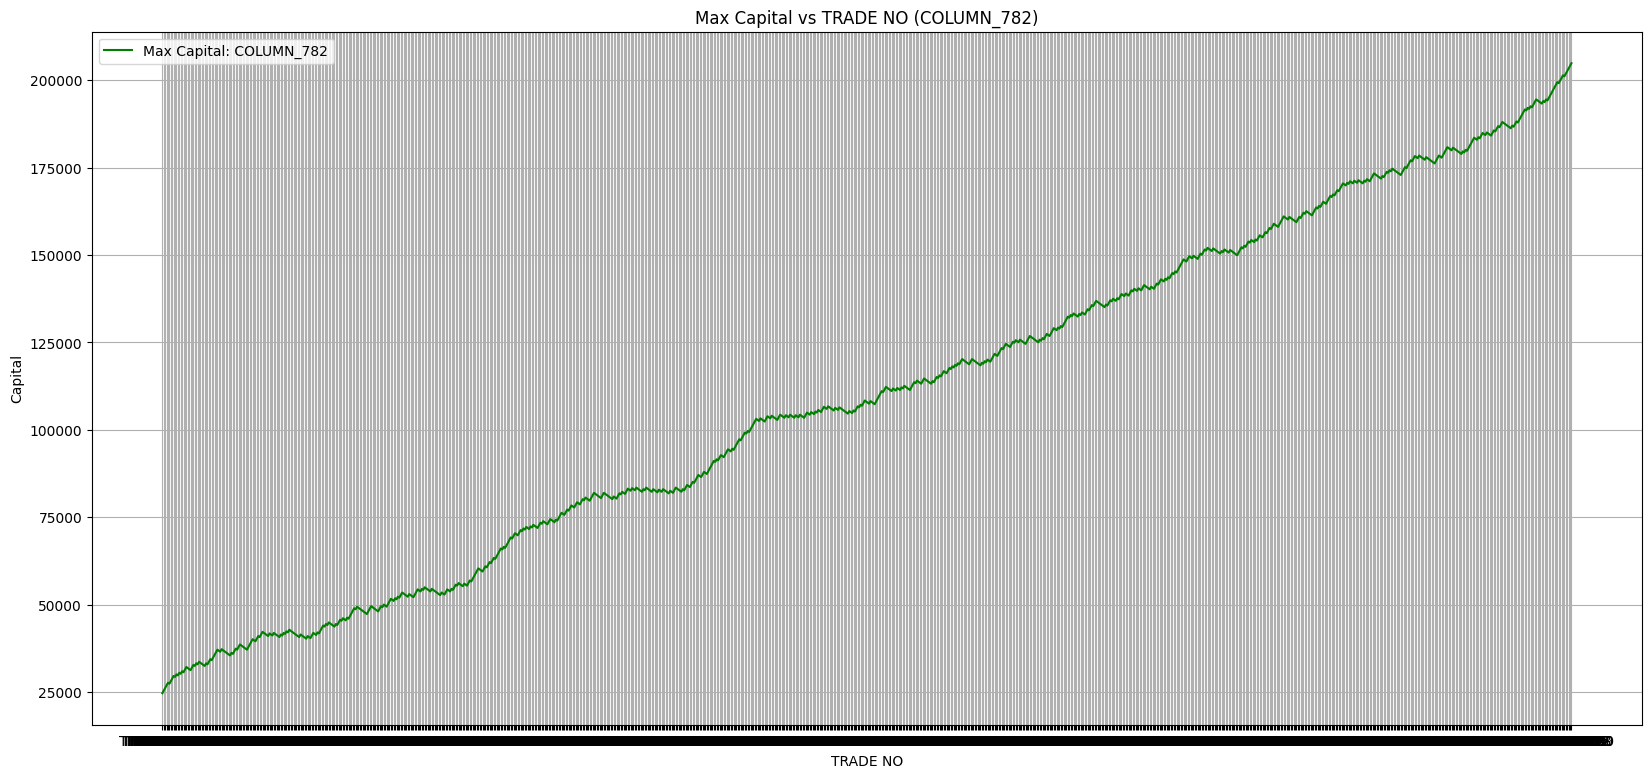

In [59]:
# Identify the max value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_column = numeric_values.idxmax(axis=1).values[0]

# Plot max capital vs TRADE NO
fig, ax = plt.subplots(figsize=(20, 9))

# Set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot with green line
ax.plot(df_no_charges['TRADE NO'],
        df_no_charges[max_column],
        label=f'Max Capital: {max_column}',
        color='green')

# Labels, title, legend, and grid
ax.set_xlabel('TRADE NO')
ax.set_ylabel('Capital')
ax.set_title(f'Max Capital vs TRADE NO ({max_column})')
ax.legend()
ax.grid(True)

# Show plot
plt.show()

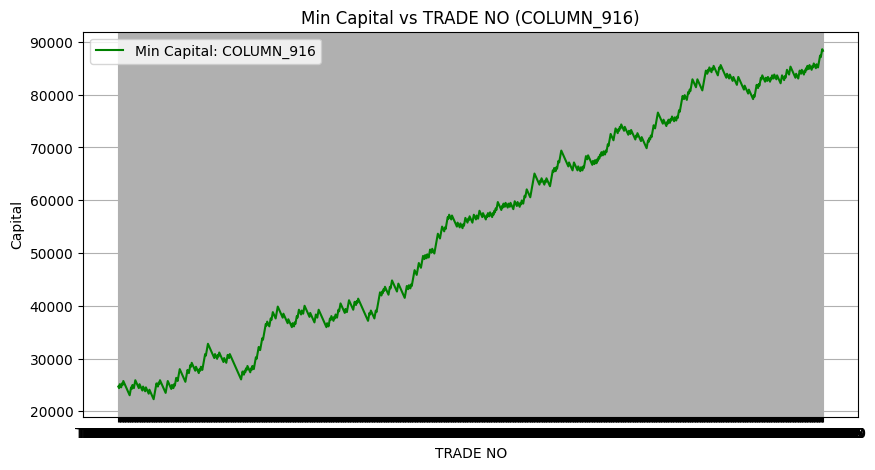

In [60]:
# Identify the min value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_column = numeric_values.idxmin(axis=1).values[0]

# Plot min capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[min_column], label=f'Min Capital: {min_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_column})')
plt.legend()
plt.grid(True)
plt.show()

# **QUANTITY CALCULATION**

PnL without charges and lot qty based on 2% of capital

In [61]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Calculate the risk per trade
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate entry price and lot size
        entry_price = entry_df[column].iloc[i]
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0  # Calculate QTY

        qty_column.append(qty)

        # Calculate PnL for the current trade based on target or stoploss
        pnl_value = (REWARD_POINTS if target_stoploss_df[column].iloc[i] == "TARGET" else -RISK_POINTS) * LOT_SIZE
        trade_pnl = qty * pnl_value  # Multiply QTY with PnL per trade

        # Update cumulative capital for the next row
        cumulative_capital += trade_pnl
        pnl_column.append(cumulative_capital)

    # Store the PnL and QTY values in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Save the DataFrame to a single CSV file
final_df.to_csv('PnL_variable_lot.csv', index=False)

# Print confirmation message
print("CSV file 'PnL_variable_lot.csv' has been created with QTY and cumulative PnL.")

CSV file 'PnL_variable_lot.csv' has been created with QTY and cumulative PnL.


In [62]:
pd.read_csv('PnL_variable_lot.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,25750.0,1,25750.0,1,24700.0,1,25750.0,1,...,1,25750.0,1,25750.0,1,24700.0,1,24700.0,1,24700.0
1,TRADE 0002,1,26500.0,1,26500.0,1,25450.0,1,26500.0,1,...,1,26500.0,1,26500.0,1,25450.0,1,24400.0,1,25450.0
2,TRADE 0003,1,27250.0,1,27250.0,1,25150.0,1,27250.0,1,...,1,27250.0,1,27250.0,1,25150.0,1,24100.0,1,25150.0
3,TRADE 0004,1,26950.0,1,26950.0,1,24850.0,1,26950.0,1,...,1,28000.0,1,28000.0,1,25900.0,1,23800.0,1,25900.0
4,TRADE 0005,1,26650.0,1,26650.0,1,25600.0,1,26650.0,1,...,1,28750.0,1,28750.0,1,25600.0,1,24550.0,1,25600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,3021,44416000.0,9082,133516600.0,745,10961800.0,1372,21614200.0,4332,...,796,11716000.0,1922,28261900.0,621,9133900.0,2511,36924400.0,837,12311200.0
996,TRADE 0997,2961,43527700.0,8901,130846300.0,730,10742800.0,1440,22694200.0,4245,...,781,12301750.0,1884,29674900.0,608,8951500.0,2461,38770150.0,820,12926200.0
997,TRADE 0998,2901,45703450.0,8723,128229400.0,716,10528000.0,1512,23828200.0,4458,...,820,12055750.0,1978,29081500.0,596,9398500.0,2584,40708150.0,861,12667900.0
998,TRADE 0999,3046,47987950.0,8548,134640400.0,701,10317700.0,1588,25019200.0,4368,...,803,12658000.0,1938,30535000.0,626,9210700.0,2713,39894250.0,844,13300900.0


In [63]:
# Load the data from the CSV file
df_QTY = pd.read_csv('PnL_variable_lot.csv')

# Get the last row
last_row = df_QTY.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Set your base capital (replace with your actual value)
BASE_CAPITAL = 100000

# Print QTY results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")
print(f"Min QTY: {min_qty:.0f} in Column: {min_qty_column}")

# Print Capital results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = (max_capital * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = (min_capital * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max QTY: 81083 in Column: COLUMN_782_QTY
Min QTY: 46 in Column: COLUMN_916_QTY
Max Capital: 1277068900 in Column: COLUMN_782_CUM_PNL
Max Capital growth with 1 lot: 1277068.90 %
Min Capital: 683050 in Column: COLUMN_916_CUM_PNL
Min Capital growth with 1 lot: 683.05 %


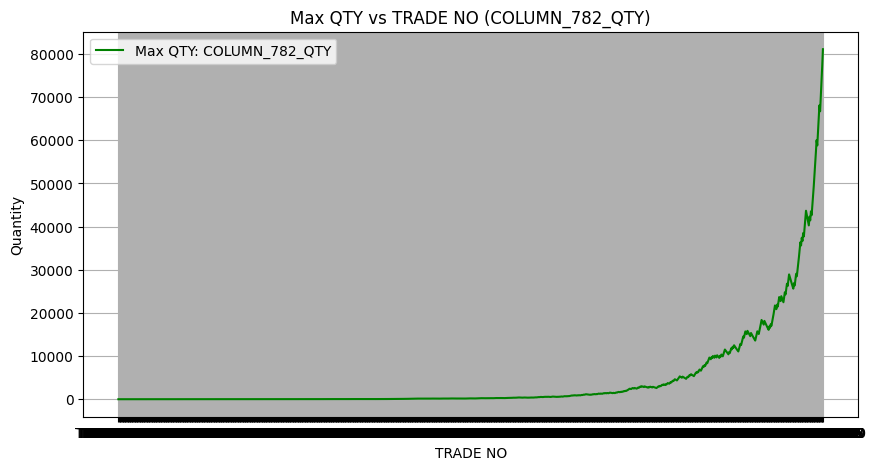

In [64]:
# Identify the column with max QTY
last_row = df_QTY.iloc[-1]
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

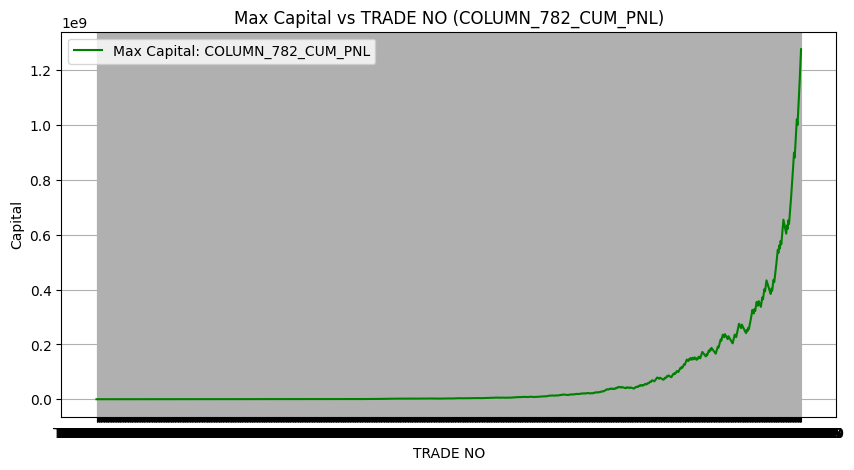

In [65]:
# Identify the column with max capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

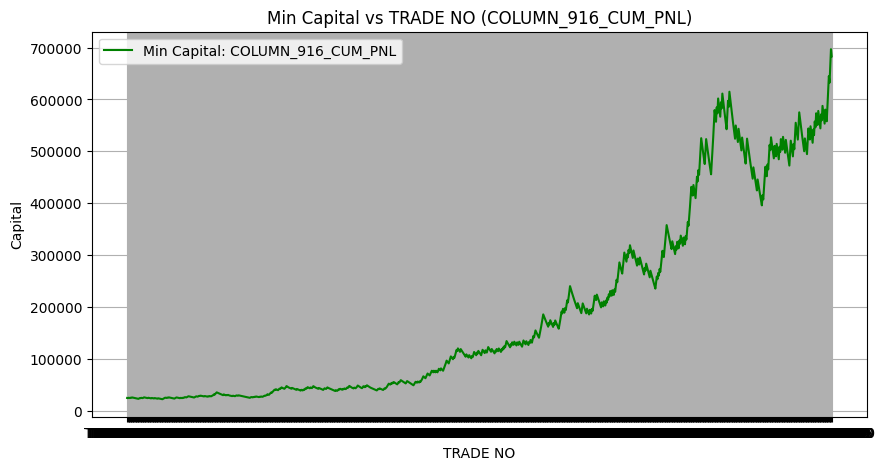

In [66]:
# Identify the column with min capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 81083


In [68]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 1277068900.0


In [69]:
import pandas as pd

# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Extract entry price and target/stoploss information
        entry_price = entry_df[column].iloc[i]
        target_or_stoploss = target_stoploss_df[column].iloc[i]

        # Calculate the risk per trade based on the current cumulative capital
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate QTY for the current trade dynamically
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0
        qty_column.append(qty)

        # Calculate Buy and Sell Values
        buy_value = entry_price * LOT_SIZE * qty
        sell_value = (entry_price + (REWARD_POINTS if target_or_stoploss == "TARGET" else -RISK_POINTS)) * LOT_SIZE * qty

        # Calculate Net PnL
        net_pnl = sell_value - buy_value

        # Calculate Transaction Charges
        transaction_charges_buy = transaction_charges_pct / 100 * buy_value
        transaction_charges_sell = transaction_charges_pct / 100 * sell_value
        stt = stt_pct / 100 * sell_value
        ipft = ipft_pct / 100 * (buy_value + sell_value)
        stamp_duty = stamp_duty_pct / 100 * (buy_value + sell_value)
        sebi_charges = sebi_charges_pct / 100 * (buy_value + sell_value)

        # Total Charges
        total_charges = (brokerage +
                         transaction_charges_buy +
                         transaction_charges_sell +
                         stt +
                         ipft +
                         stamp_duty +
                         sebi_charges)

        # GST Calculation
        gst = gst_pct * total_charges

        # Final PnL Calculation
        if net_pnl > 0:  # Profit scenario
            final_pnl = net_pnl - (total_charges + gst)
        else:  # Loss scenario
            final_pnl = net_pnl + (-total_charges - gst)

        # Update cumulative capital for the next row
        cumulative_capital += final_pnl
        pnl_column.append(cumulative_capital)

    # Store the QTY values as integers and cumulative PnL as floats in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Format the cumulative PnL column to 2 decimal places
for column in entry_df.columns[1:]:
    final_df[f"{column}_CUM_PNL"] = final_df[f"{column}_CUM_PNL"].apply(lambda x: f"{float(x):.2f}")

# Save the DataFrame to a CSV file
final_df.to_csv('final_PnL_charges.csv', index=False)

# Print confirmation message
print("CSV file 'final_PnL_charges.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.")

CSV file 'final_PnL_charges.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.


In [70]:
pd.read_csv('final_PnL_charges.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,6,1.044085e+05,6,1.044273e+05,6,98136.10,6,104423.92,6,...,6,104414.69,6,104432.39,6,98126.31,6,9.812255e+04,6,98144.95
1,TRADE 0002,6,1.088204e+05,6,1.088441e+05,6,102552.87,6,108849.15,6,...,6,108849.34,6,108866.28,6,102547.97,6,9.626543e+04,6,102571.69
2,TRADE 0003,7,1.139724e+05,7,1.139879e+05,6,100688.22,7,114016.10,6,...,7,114017.16,7,114033.45,6,100688.78,6,9.440417e+04,6,100704.41
3,TRADE 0004,7,1.118059e+05,7,1.117925e+05,6,98817.54,7,111836.28,6,...,7,119160.39,7,119183.92,6,105101.40,6,9.254705e+04,6,105122.11
4,TRADE 0005,7,1.096121e+05,7,1.095989e+05,6,103247.11,7,109673.60,6,...,7,124312.84,7,124328.69,7,102936.52,6,9.695779e+04,7,102937.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,7648,1.123397e+08,23046,3.385257e+08,2088,30680533.60,3362,52913071.87,12089,...,2056,30214122.26,4753,69827731.31,1575,23145520.89,7173,1.053792e+08,2172,31916843.16
996,TRADE 0997,7489,1.099973e+08,22568,3.314767e+08,2045,30048467.79,3527,55519690.16,11838,...,2014,31701172.48,4655,73249007.88,1543,22661931.74,7025,1.105717e+08,2127,33481788.69
997,TRADE 0998,7333,1.154183e+08,22098,3.246481e+08,2003,29428000.71,3701,58248283.83,12419,...,2113,31038675.37,4883,71723690.47,1510,23771638.84,7371,1.160206e+08,2232,32785412.48
998,TRADE 0999,7694,1.210910e+08,21643,3.405720e+08,1961,28813160.75,3883,61117393.66,12161,...,2069,32562245.56,4781,75250623.36,1584,23281610.99,7734,1.136275e+08,2185,34395225.40


In [71]:
# Load the data from the CSV file
df_QTY_C = pd.read_csv('final_PnL_charges.csv')

# Get the last row
last_row = df_QTY_C.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")

# Output the results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = max_capital*100/BASE_CAPITAL
print(f"Max Capital growth with variable lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = min_capital*100/BASE_CAPITAL
print(f"Min Capital growth with variable lot: {Min_Capital_growth_pct:.2f} %")

Max QTY: 223790 in Column: COLUMN_782_QTY
Max Capital: 3521439471 in Column: COLUMN_782_CUM_PNL
Max Capital growth with variable lot: 3521439.47 %
Min Capital: 1672625 in Column: COLUMN_916_CUM_PNL
Min Capital growth with variable lot: 1672.62 %


In [72]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 223790


In [73]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 3521439471.48


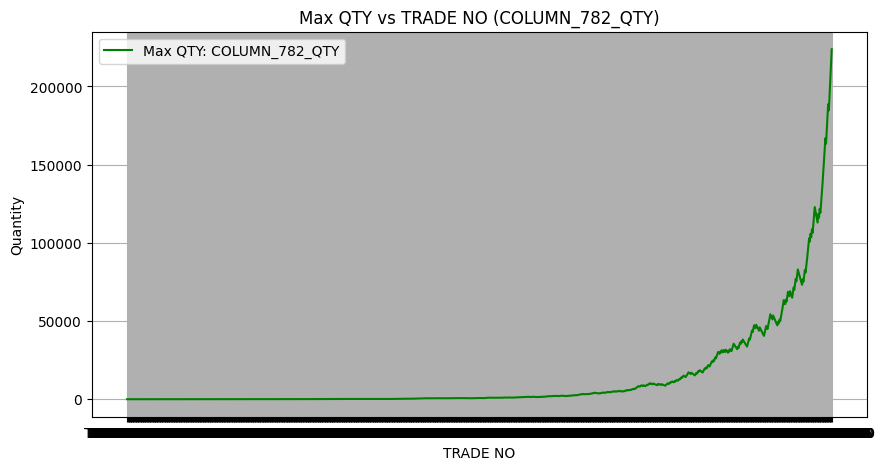

In [74]:
# Identify the column with max QTY from the last row
last_row = df_QTY_C.iloc[-1]
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


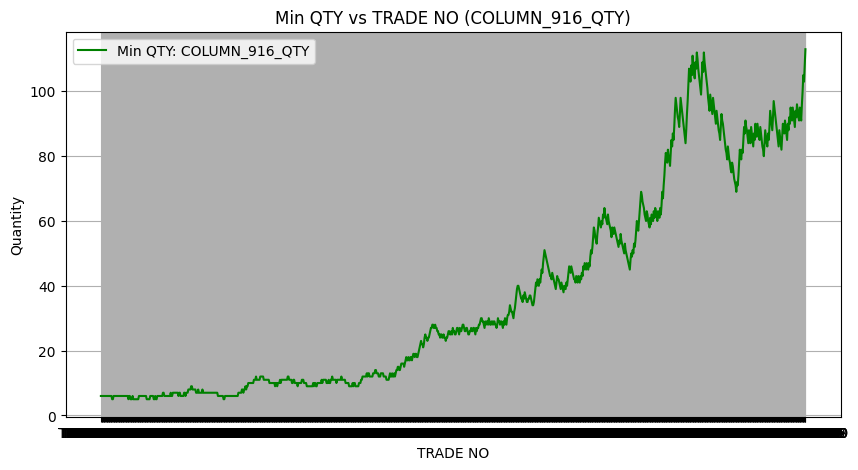

In [75]:
# Identify the column with min QTY from the last row
min_qty_column = last_row[qty_columns].idxmin()

# Plot Min QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_qty_column], label=f'Min QTY: {min_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Min QTY vs TRADE NO ({min_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

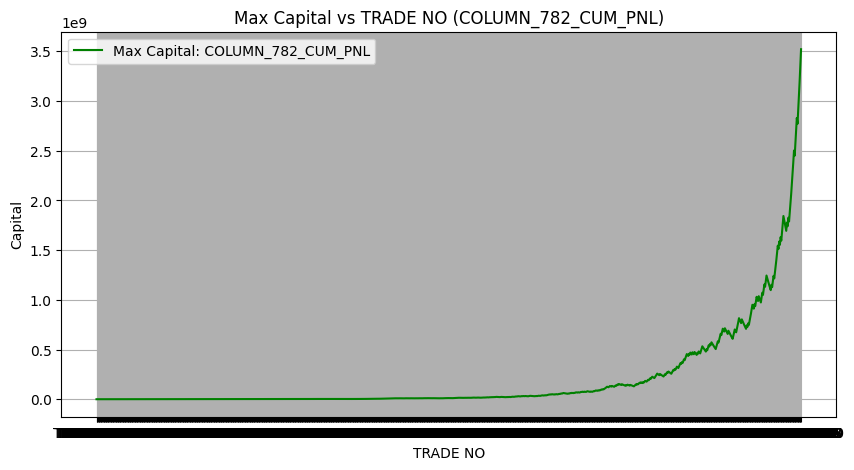

In [76]:
# Identify the column with max capital from the last row
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


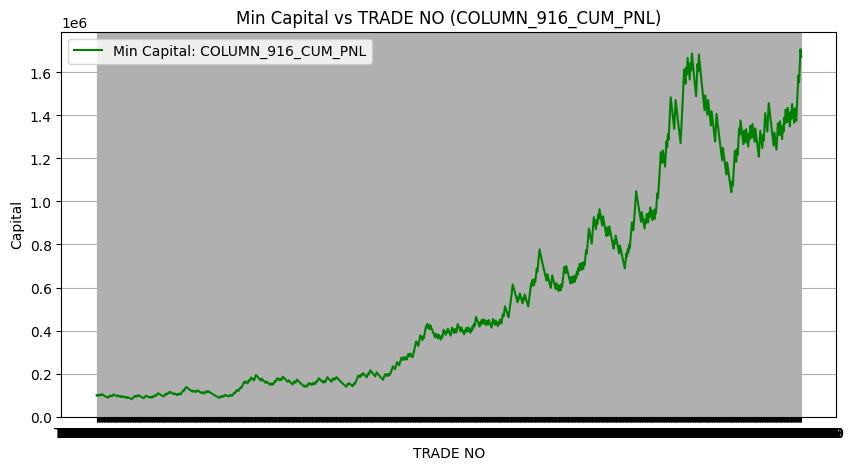

In [77]:
# Identify the column with min capital from the last row
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


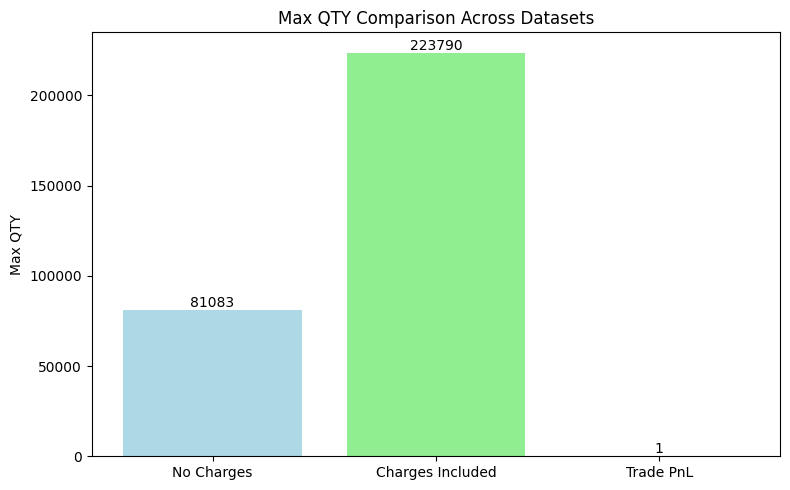

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_QTY(file_name):
    """
    Load data from a CSV file and find the maximum QTY from columns ending with '_QTY'.
    If no such columns are found, assume max quantity as 1.
    """
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent quantities (ending with '_QTY')
    qty_columns = [col for col in df.columns if col.endswith('_QTY')]

    # If QTY columns are present, find the max quantity; otherwise, assume max quantity as 1
    max_qty = last_row[qty_columns].max() if qty_columns else 1

    return max_qty

# Get Max QTY for the datasets
max_qty_no_charges = get_summary_QTY('PnL_variable_lot.csv')     # Without charges
max_qty_charges = get_summary_QTY('final_PnL_charges.csv')       # With charges

# For 'trade_pnl.csv', assume the max quantity as 1 (as per the requirement)
max_qty_additional = 1

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_qty_values = [max_qty_no_charges, max_qty_charges, max_qty_additional]

# Create a bar chart to compare Max QTY across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_qty_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max QTY')
plt.title('Max QTY Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_qty_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Max Capital (No Charges): 1277068900.0
Max Capital (Charges Included): 3521439471.48
Max Capital (Trade PnL): nan


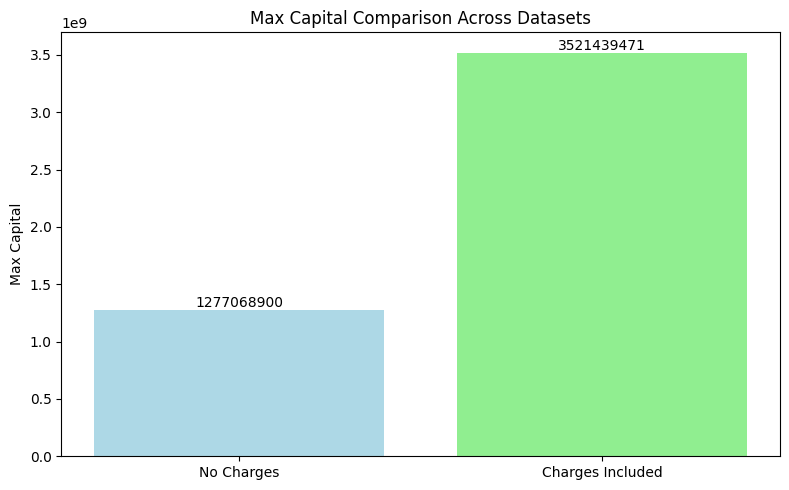

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_capital(file_name):
    """
    Load data from a CSV file and find the maximum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the maximum value in the cumulative capital columns
    max_capital = last_row[capital_columns].max()

    return max_capital

# Get Max Capital from the datasets
max_capital_no_charges = get_summary_capital('PnL_variable_lot.csv')  # No charges included
max_capital_charges = get_summary_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' and assume lot quantity is 1
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row and extract numeric values to find the max capital
last_row_trade = df_trade_pnl.iloc[-1]

# Convert the Series to a DataFrame to use select_dtypes()
last_row_trade_df = last_row_trade.to_frame().T

# Extract numeric values and find the max capital
numeric_values_trade = last_row_trade_df.select_dtypes(include=['number'])
max_capital_trade = numeric_values_trade.max(axis=1).values[0]  # Get the max value

# Debugging: Print the max capital values
print(f"Max Capital (No Charges): {max_capital_no_charges}")
print(f"Max Capital (Charges Included): {max_capital_charges}")
print(f"Max Capital (Trade PnL): {max_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_capital_values = [max_capital_no_charges, max_capital_charges, max_capital_trade]

# Create a bar chart to compare Max Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max Capital')
plt.title('Max Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Last Row from trade_pnl.csv:
TRADE NO       TRADE 1000
COLUMN_1         153400.0
COLUMN_2         169150.0
COLUMN_3         131350.0
COLUMN_4         142900.0
                  ...    
COLUMN_996       133450.0
COLUMN_997       146050.0
COLUMN_998       129250.0
COLUMN_999       153400.0
COLUMN_1000      135550.0
Name: 999, Length: 1001, dtype: object
Min Capital (No Charges): 683050.0
Min Capital (Charges Included): 1672624.88
Min Capital (Trade PnL): 88300.0


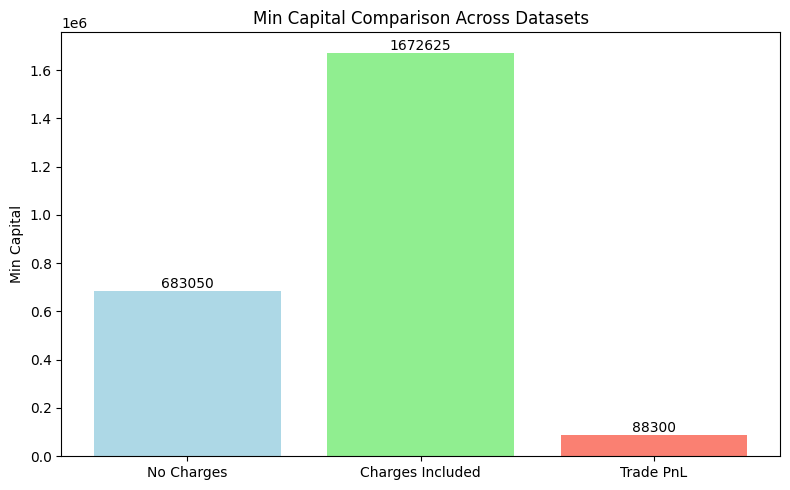

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_min_capital(file_name):
    """
    Load data from a CSV file and find the minimum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the minimum value in the cumulative capital columns
    min_capital = last_row[capital_columns].min()

    return min_capital

# Get Min Capital from the datasets
min_capital_no_charges = get_summary_min_capital('PnL_variable_lot.csv')  # No charges included
min_capital_charges = get_summary_min_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' for additional output
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row
last_row_trade = df_trade_pnl.iloc[-1]
print("Last Row from trade_pnl.csv:")
print(last_row_trade)  # Print the last row to check its contents

# Convert all values to numeric, coercing errors to NaN
numeric_values_trade = pd.to_numeric(last_row_trade, errors='coerce')

# Get the minimum capital from the numeric values
min_capital_trade = numeric_values_trade.min() if not numeric_values_trade.isnull().all() else None  # Safely handle all NaN case

# Debugging: Print the min capital values
print(f"Min Capital (No Charges): {min_capital_no_charges}")
print(f"Min Capital (Charges Included): {min_capital_charges}")
print(f"Min Capital (Trade PnL): {min_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
min_capital_values = [min_capital_no_charges, min_capital_charges, min_capital_trade]

# Create a bar chart to compare Min Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, min_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Min Capital')
plt.title('Min Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(min_capital_values):
    if pd.notna(v):  # Check if the value is not NaN
        plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()